## Import modules

In [45]:
import pandas as pd
import numpy as np
import PopularityBased_Recommenders as Recommenders
import contentBased_recommender as contentBased_recommender

In [46]:
import matplotlib.pyplot as plt

In [47]:
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Loading the dataset

# ....................................................................

In [48]:
# First Dataset
#  - This dataset contains , user_id, song_id and listen_count
song_dataset1 = pd.read_csv('triplets_file.csv')
song_dataset1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [49]:
# Second Dataset
#  - This dataset contains , song_id, title, release,artist_name and year of release
song_dataset2 = pd.read_csv('song_data.csv')
song_dataset2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [50]:
# Combining both the datasets (First dataset + Second dataset)
song_datasetMaster = pd.merge(song_dataset1, song_dataset2.drop_duplicates(['song_id']), on='song_id', how='left')
song_datasetMaster.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [51]:
# Displaying the length of first dataset(song1) & second dataset(song2)
print(len(song_dataset1), len(song_dataset2))

2000000 1000000


In [52]:
# Displaying the length of the combined dataset
len(song_datasetMaster)

2000000

## Data Preprocessing

In [53]:
# creating new feature combining title and artist name
song_datasetMaster['song'] = song_datasetMaster['title']+' - '+song_datasetMaster['artist_name']
song_datasetMaster.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [54]:
# taking top 10k samples for quick results
song_datasetMaster = song_datasetMaster.head(10000)

In [55]:
# cummulative sum of listen count of the songs
song_grouped = song_datasetMaster.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Round Midnight - Miles Davis,3
4,'Till I Collapse - Eminem / Nate Dogg,6


In [56]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


In [88]:
#exploring dataset
%matplotlib inline

In [96]:
song_datasetMaster = song_datasetMaster.sample(frac=0.1, random_state = 1)

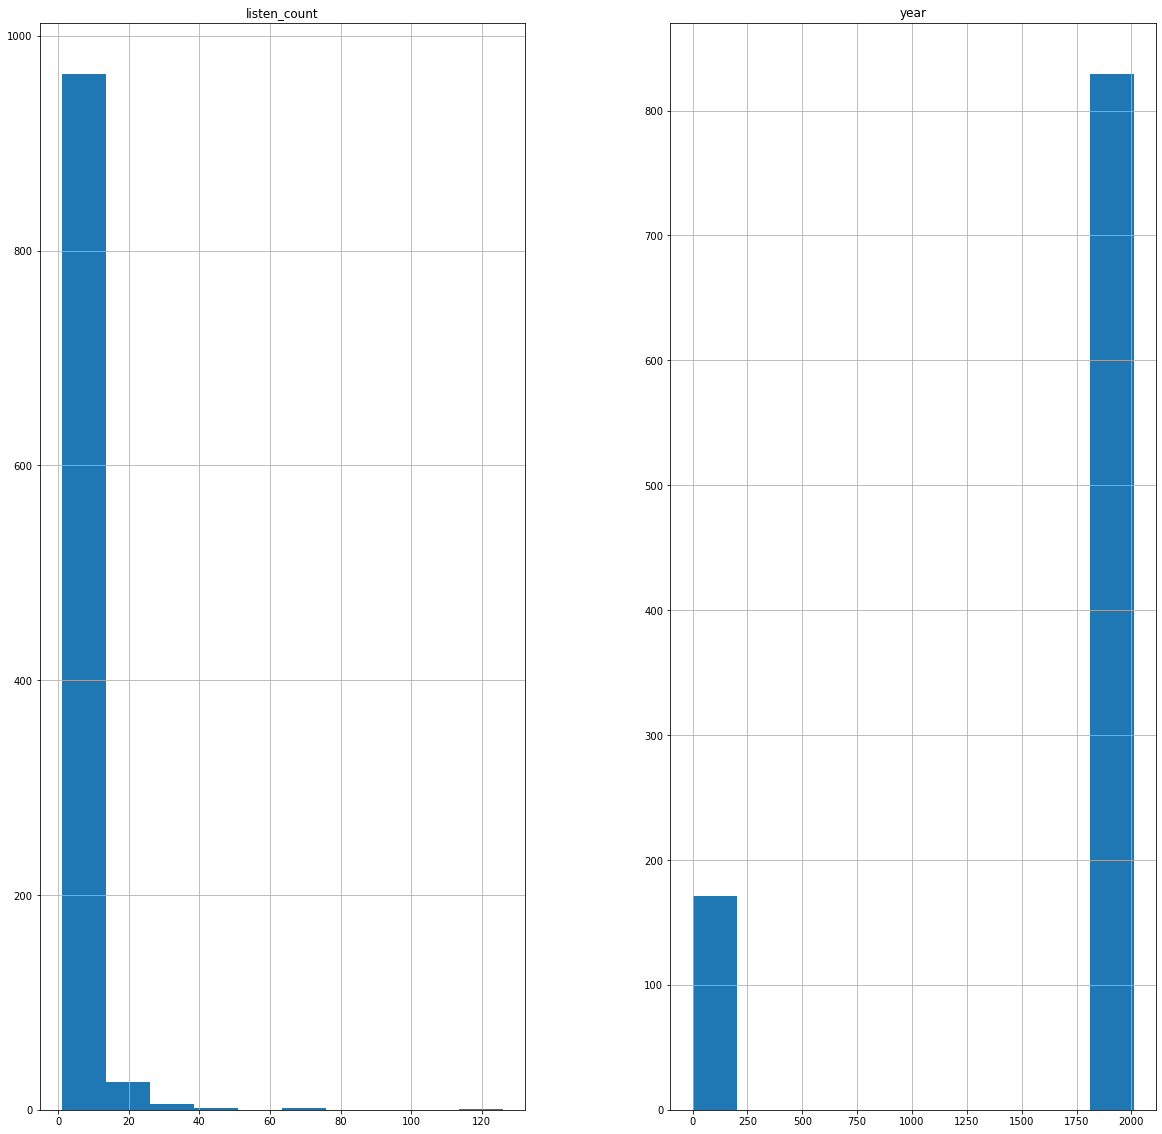

In [97]:
song_datasetMaster.hist(figsize = (20, 20))
plt.show()

In [98]:
song_grouped = song_grouped.sample(frac=0.1, random_state = 1)

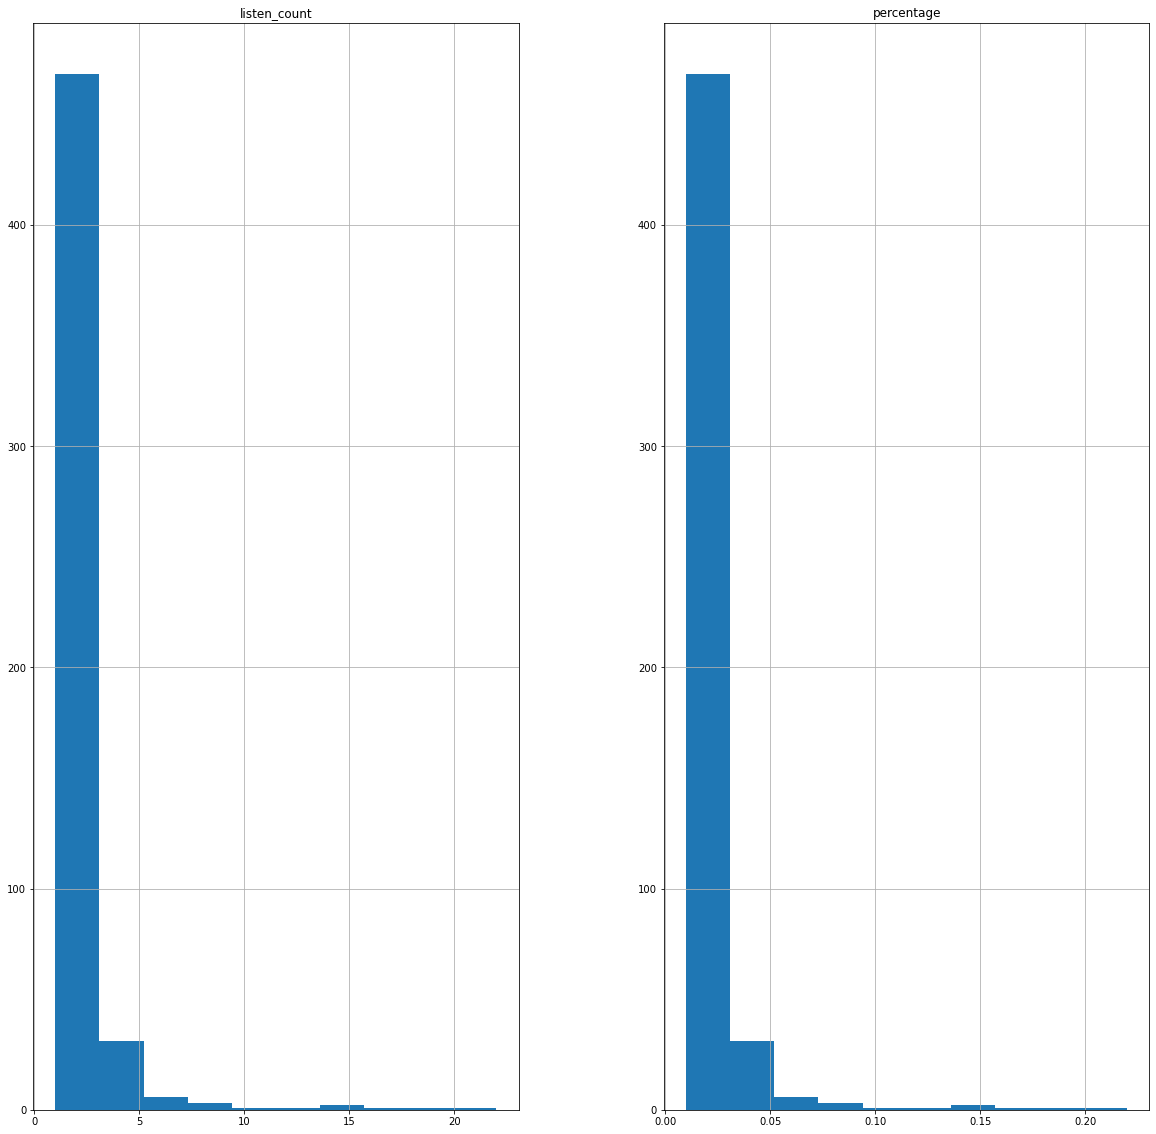

In [99]:
song_grouped.hist(figsize = (20, 20))
plt.show()

## Popularity Recommendation Engine

In [62]:
pr = Recommenders.popularity_recommender_py()

In [63]:
pr.create(song_datasetMaster, 'user_id', 'song')

In [64]:
# display the top 10 popular songs
pr.recommend(song_datasetMaster['user_id'][5])

,user_id,song,score,Rank
3660,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,45,1.0
4678,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,2.0
5105,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,3.0
1071,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,28,5.0
4378,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,6.0
4712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,7.0
3476,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,26,8.0
1387,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,24,9.0
1862,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


In [65]:
pr.recommend(song_datasetMaster['user_id'][100])

,user_id,song,score,Rank
3660,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,45,1.0
4678,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,32,2.0
5105,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,32,3.0
1071,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,28,5.0
4378,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,27,6.0
4712,e006b1a48f466bf59feefed32bec6494495a4436,Use Somebody - Kings Of Leon,27,7.0
3476,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,26,8.0
1387,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,24,9.0
1862,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


# Content-Based Recommendation Engine

In [66]:
#taking a sample of 5000 songs
song_ = song_datasetMaster.sample(n=5000).reset_index(drop=True)

In [67]:
#We use TF-IDF vectorizer that calculates the TF-IDF score for each song title, word-by-word. 
#Here, we pay particular attention to the arguments we specify.
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [68]:
title_matrix = tfidf.fit_transform(song_['title'])

In [69]:
#How do we use this matrix for a recommendation?
#We now need to calculate the similarity of one title to another. We are going to use cosine similarity.
#We want to calculate the cosine similarity of each item with every other item in the dataset. So we just pass the title_matrix as argument.

In [70]:
#Cosine similarity - passing the title_matrix as argument.
cosine_similarities = cosine_similarity(title_matrix)

In [71]:
#Once we get the similarities, we store in a dictionary with the names of the 50 most similar songs for each song in the dataset.
similarities = {}

In [72]:
for i in range(len(cosine_similarities)):
    # Now we'll sort each element in cosine_similarities and get the indexes of the songs. 
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    # After that, we'll store in similarities each name of the 50 most similar songs.
    # Except the first one that is the same song.
    similarities[song_['song'].iloc[i]] = [(cosine_similarities[i][x], song_['song'][x], song_['year'][x]) for x in similar_indices][1:]

In [73]:
#We can use that similarity scores to access the most similar items and give a recommendation.
#For that, we'll define our Content based recommender class. We already done that in the contentBased_recommender module.

In [74]:
#Now,we instantiate class
cbr_recommedations = contentBased_recommender.ContentBasedRecommender(similarities)

In [75]:
#Then, we are ready to pick a song from the dataset and make a recommendation.
recommendation = {
    "song": song_['song'].iloc[20],
    "number_songs": 4
}

In [76]:
cbr_recommedations.recommend(recommendation)

The 4 recommended songs for the title : God Put A Smile Upon Your Face - Coldplay are:
Number 1:
God - OutKast in 0 with 0.595 similarity score
--------------------
Number 2:
Face To Face - Daft Punk in 2001 with 0.572 similarity score
--------------------
Number 3:
Without A Face - Rage Against The Machine in 1996 with 0.572 similarity score
--------------------
Number 4:
Face To Face - Daft Punk in 2001 with 0.572 similarity score
--------------------


In [77]:
#And we can pick another random song and recommend again and lets recommend 7 songs this time:
recommendation = {
    "song": song_['song'].iloc[10],
    "number_songs": 7
}

In [78]:
cbr_recommedations.recommend(recommendation)

The 7 recommended songs for the title : They Might Follow You - Tiny Vipers are:
Number 1:
They Might Follow You - Tiny Vipers in 2007 with 1.0 similarity score
--------------------
Number 2:
They Might Follow You - Tiny Vipers in 2007 with 1.0 similarity score
--------------------
Number 3:
They Might Follow You - Tiny Vipers in 2007 with 1.0 similarity score
--------------------
Number 4:
They Might Follow You - Tiny Vipers in 2007 with 1.0 similarity score
--------------------
Number 5:
They Might Follow You - Tiny Vipers in 2007 with 1.0 similarity score
--------------------
Number 6:
They Might Follow You - Tiny Vipers in 2007 with 1.0 similarity score
--------------------
Number 7:
They Might Follow You - Tiny Vipers in 2007 with 1.0 similarity score
--------------------
